In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

-City : City in which the Olympic Games were held
-Year - Year in which the Olympic Games were held
-Sport - Sport Category (eg. Aquatics, Atheletics etc.)
-Discipline - The discipline within the sport (eg. Diving, Swimming etc.)
-Event - Event Name within the particular discipline (eg. 3m springboard, 10m platform etc.)
-Athlete - Winner Name in that event
-Gender - Gender
-Country_Code - 3 character country code
-Country - Country to which the winning athlete belongs to
-Event_gender - Genders which participated in the event (Male, Female or Common Event)
-Medal - Medal (eg. Bronze, Silver, Gold)

In [3]:
data_origin = pd.read_csv("athlete_events.csv", encoding='latin-1')
data = data_origin.copy()
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
data.shape

(271116, 15)

In [5]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [6]:
data.info

<bound method DataFrame.info of             ID                      Name Sex   Age  Height  Weight  \
0            1                 A Dijiang   M  24.0   180.0    80.0   
1            2                  A Lamusi   M  23.0   170.0    60.0   
2            3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   
...        ...                       ...  ..   ...     ...     ...   
271111  135569                Andrzej ya   M  29.0   179.0    89.0   
271112  135570                  Piotr ya   M  27.0   176.0    59.0   
271113  135570                  Piotr ya   M  27.0   176.0    59.0   
271114  135571        Tomasz Ireneusz ya   M  30.0   185.0    96.0   
271115  135571        Tomasz Ireneusz ya   M  34.0   185.0    96.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summe

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


In [8]:
data.isnull().any() # The "isnull()" function checks each cell, returning True for cells with missing values (NaN, None or Null), or False otherwise. 
                    #The "any()" function returns True if each column has at least one True value, otherwise False.

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
dtype: bool

In [9]:
pd.set_option('display.max_rows', 200); #  Display of the DataFrame to a maximum of 200 rows
data.nunique()

ID        135571
Name      134732
Sex            2
Age           74
Height        95
Weight       220
Team        1184
NOC          230
Games         51
Year          35
Season         2
City          42
Sport         66
Event        765
Medal          3
dtype: int64

There are 135 columns in the dataset. We rename those that provide meaningful insights as we analyze.

In [10]:
df=data.copy()
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [11]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [12]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [13]:
df.describe().T #Before filling null values

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


In [14]:
df[['Age', 'Height', 'Weight']] = df[['Age', 'Height', 'Weight']].fillna(df[['Age', 'Height', 'Weight']].mean())

In [15]:
df.isnull().sum() # No Null or Missing values left in the data set

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [16]:
df.describe().T # After filling null values

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.000000,102097.25,135571.0
Age,271116.0,25.556898,6.280857,10.0,22.0,25.000000,28.00,97.0
Height,271116.0,175.338970,9.278100,127.0,170.0,175.338970,180.00,226.0
Weight,271116.0,70.702393,12.574690,25.0,63.0,70.702393,75.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.000000,2002.00,2016.0


In [17]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

A scatter plot is a type of chart used to visualize the relationship between two numerical variables of data. This type of chart is a chart shape in which points are positioned on a plane.

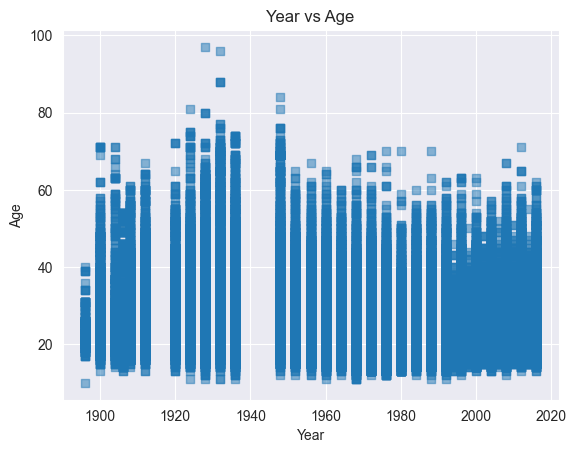

In [18]:
# Create a scatter plot using the values from the "Year" and "Age" columns
plt.scatter(df['Year'], df['Age'], alpha=0.5, marker='s', linestyle='solid')

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Age')
plt.title('Year vs Age')

plt.show()

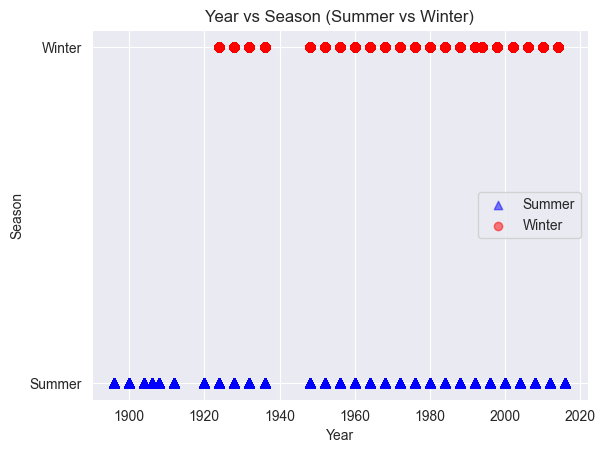

In [19]:
plt.scatter(df[df['Season'] == 'Summer']['Year'], df[df['Season'] == 'Summer']['Season'], color='blue', marker='^', label='Summer', alpha=0.5)
plt.scatter(df[df['Season'] == 'Winter']['Year'], df[df['Season'] == 'Winter']['Season'], color='red', marker='o', label='Winter', alpha=0.5)

# Set the axis labels and title
plt.xlabel('Year')
plt.ylabel('Season')
plt.title('Year vs Season (Summer vs Winter)')

# Add a legend
plt.legend(loc='center right') #Getting the descriptions of the different items in the chart to the right

# Display the plot
plt.show()

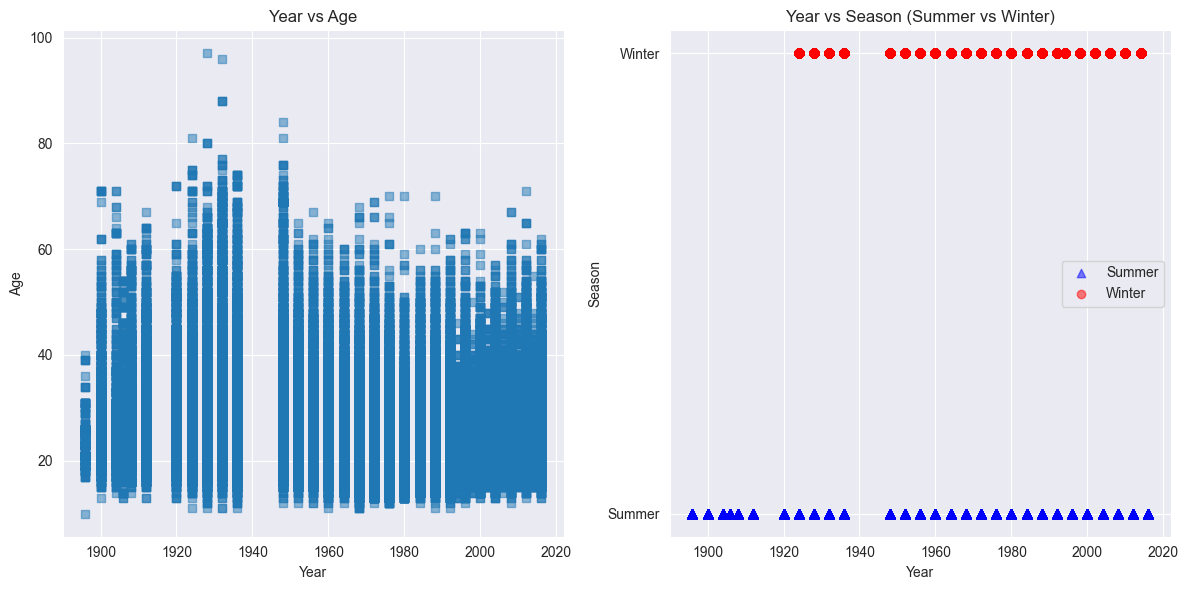

In [20]:
# Create subgraphs
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6)) #can set the nrows=2, ncols=1 to show in the bottom.

# # First subplot: Year vs Age scatter plot
axs[0].scatter(df['Year'], df['Age'], alpha=0.5, marker='s', linestyle='solid')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Age')
axs[0].set_title('Year vs Age')

# Second subplot: Year vs Season scatter plot
axs[1].scatter(df[df['Season'] == 'Summer']['Year'], df[df['Season'] == 'Summer']['Season'], color='blue', marker='^', label='Summer', alpha=0.5)
axs[1].scatter(df[df['Season'] == 'Winter']['Year'], df[df['Season'] == 'Winter']['Season'], color='red', marker='o', label='Winter', alpha=0.5)
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Season')
axs[1].set_title('Year vs Season (Summer vs Winter)')
axs[1].legend(loc='center right')

# Adjust spacing between subgraphs
plt.tight_layout()
plt.show()

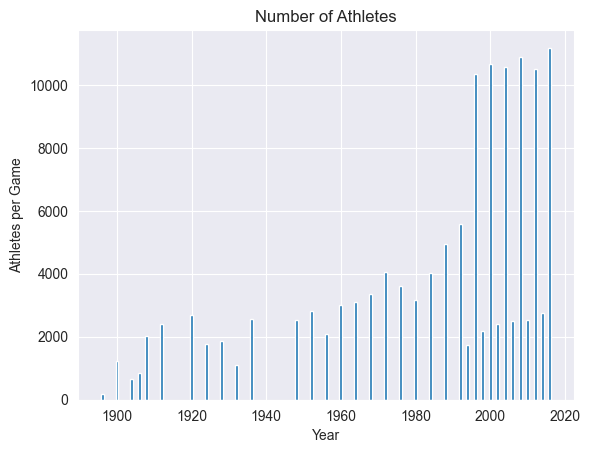

In [21]:
# Calculate the number of athletes per Olympic Game
athletes_per_game = df.groupby('Year')['ID'].nunique() / df.groupby('Year')['Games'].nunique()
# df.groupby('Year')['ID'].nunique(),groups the dataset based on the "Year" column and calculates the number of unique athletes per year.
# df.groupby('Year')['Games'].nunique(),groups the dataset again based on the "Year" column and calculates the number of unique olympic games per year.

# Create bar plot
plt.bar(athletes_per_game.index, athletes_per_game.values)

plt.xlabel('Year')
plt.ylabel('Athletes per Game')
plt.title('Number of Athletes')
plt.show()

C:\Users\qwert\AppData\Local\Temp\ipykernel_10764\1522647061.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


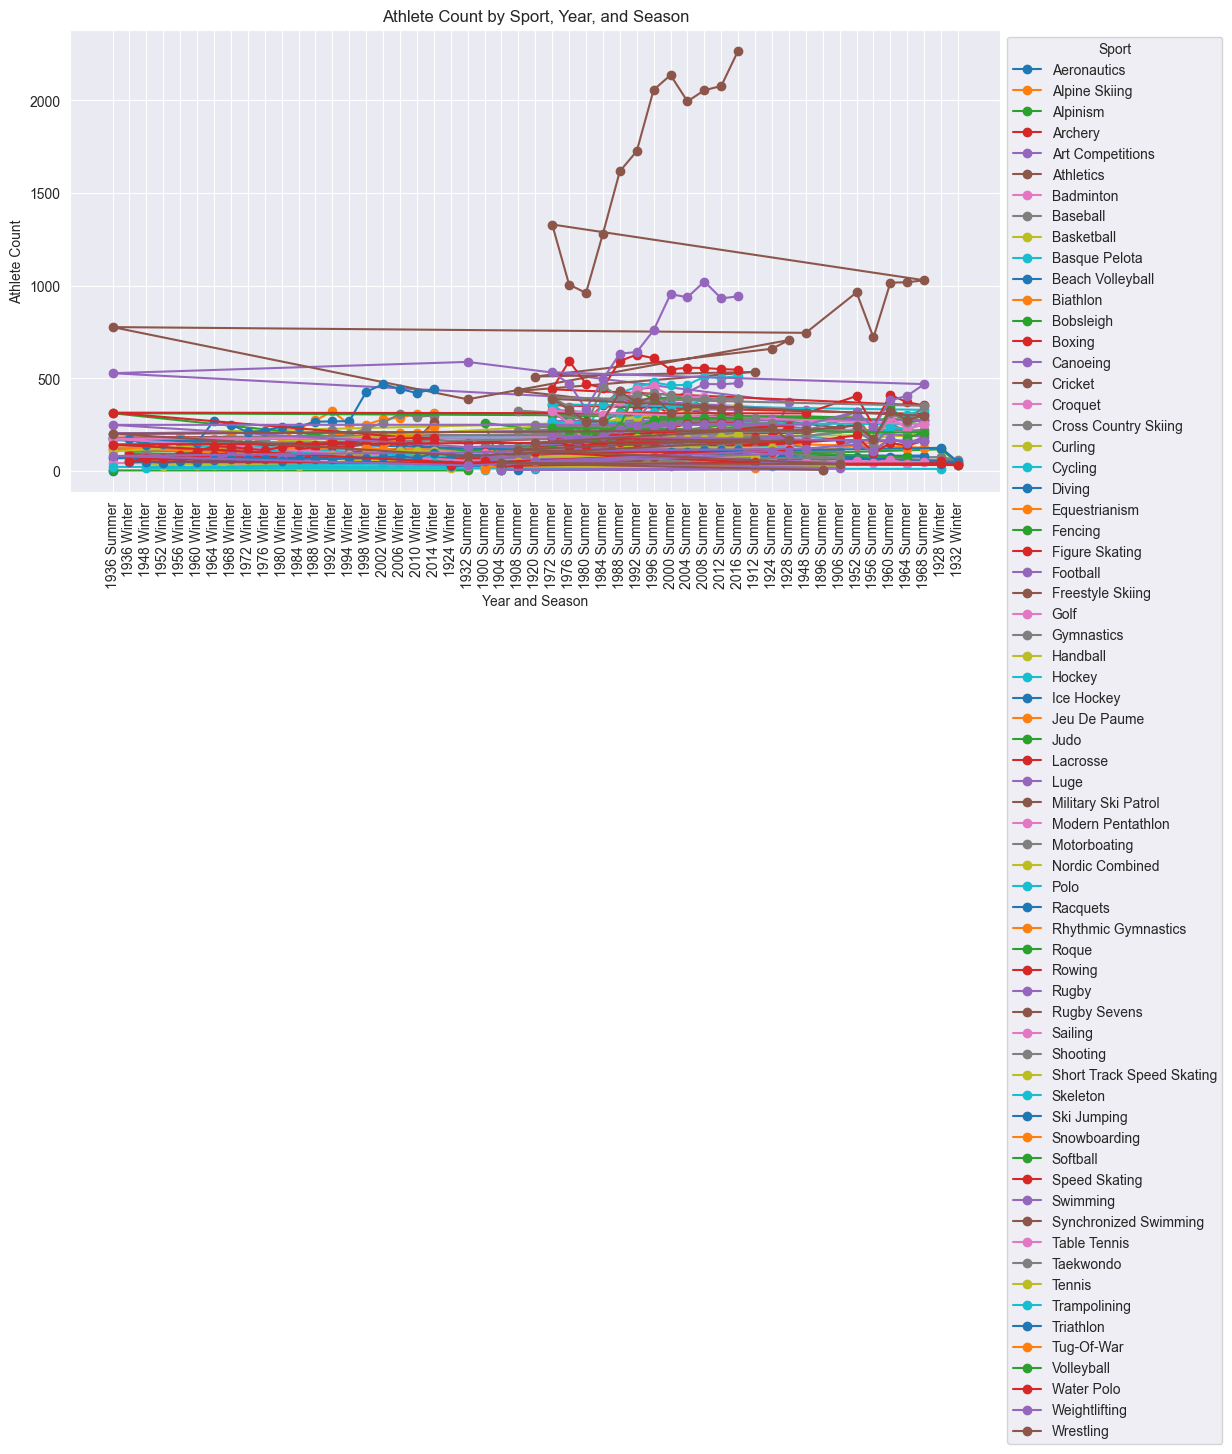

In [78]:
# Calculate the number of athletes per sport and group it
athlete_counts = df.groupby(['Sport', 'Year', 'Season'])['Name'].nunique().reset_index()

# Plotting the graph
fig, ax = plt.subplots(figsize=(12, 6))

# Get the unique sports
sports = athlete_counts['Sport'].unique()

# Plot a bar plot showing the number of athletes for each sport
for i, sport in enumerate(sports):
    sport_data = athlete_counts[athlete_counts['Sport'] == sport]
    x = sport_data['Year'].astype(str) + ' ' + sport_data['Season']
    y = sport_data['Name']
    ax.plot(x, y, marker='o', label=sport)

# Graph settings
ax.set_xlabel('Year and Season')
ax.set_ylabel('Athlete Count')
ax.set_title('Athlete Count by Sport, Year, and Season')
ax.legend(title='Sport', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



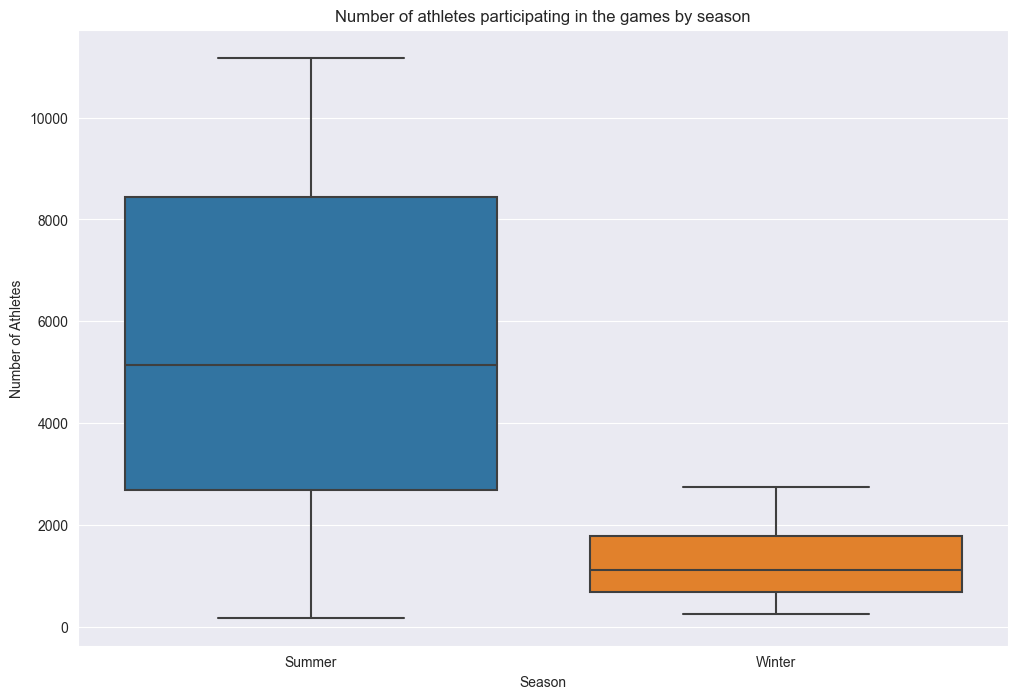

In [75]:
# Group the number of athletes by Games and Season
name_count_games_season = df.groupby(["Games", "Season"])["Name"].nunique().reset_index()

# Create a boxplot
plt.figure(figsize=(12, 8))  # Adjust the figure size as desired
sns.boxplot(x=name_count_games_season["Season"], y=name_count_games_season["Name"])
plt.title("Number of athletes participating in the games by season")
plt.xlabel("Season")
plt.ylabel("Number of Athletes")

# Display the boxplot
plt.show()


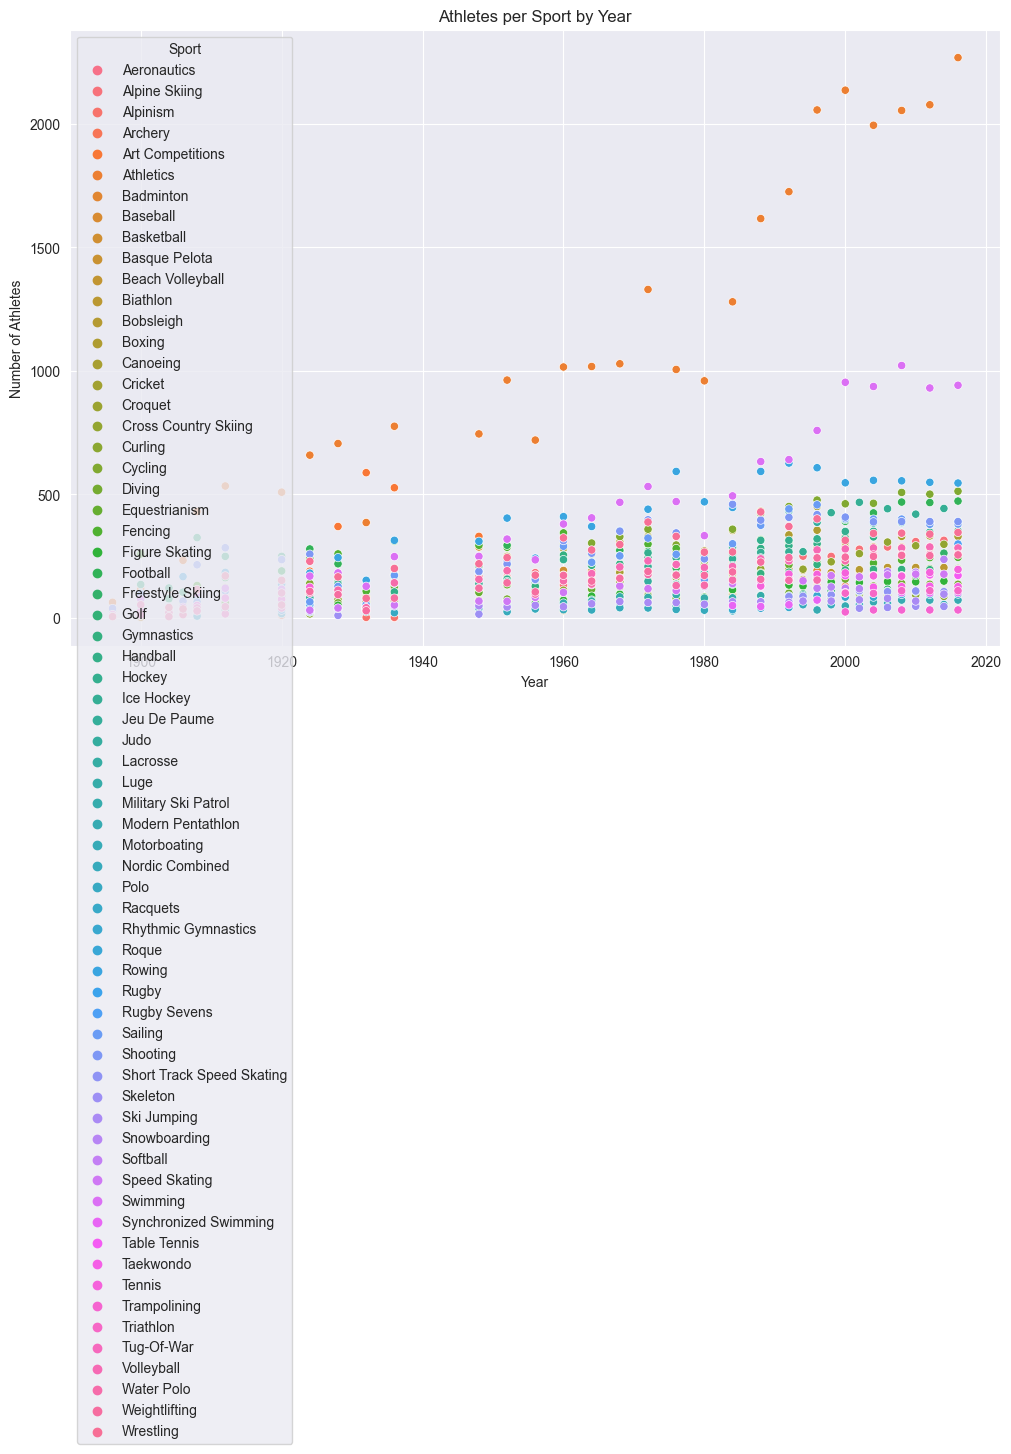

In [77]:
# Calculate the number of unique Names per Sport and Year
name_count_sport_year = df.groupby(["Sport", "Year"])["Name"].nunique().reset_index()

# Create a scatter plot
plt.figure(figsize=(12, 8))  # Adjust the figure size as desired
sns.scatterplot(x=name_count_sport_year["Year"], y=name_count_sport_year["Name"], hue=name_count_sport_year["Sport"])
plt.title("Athletes per Sport by Year")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")

# Display the scatter plot
plt.show()


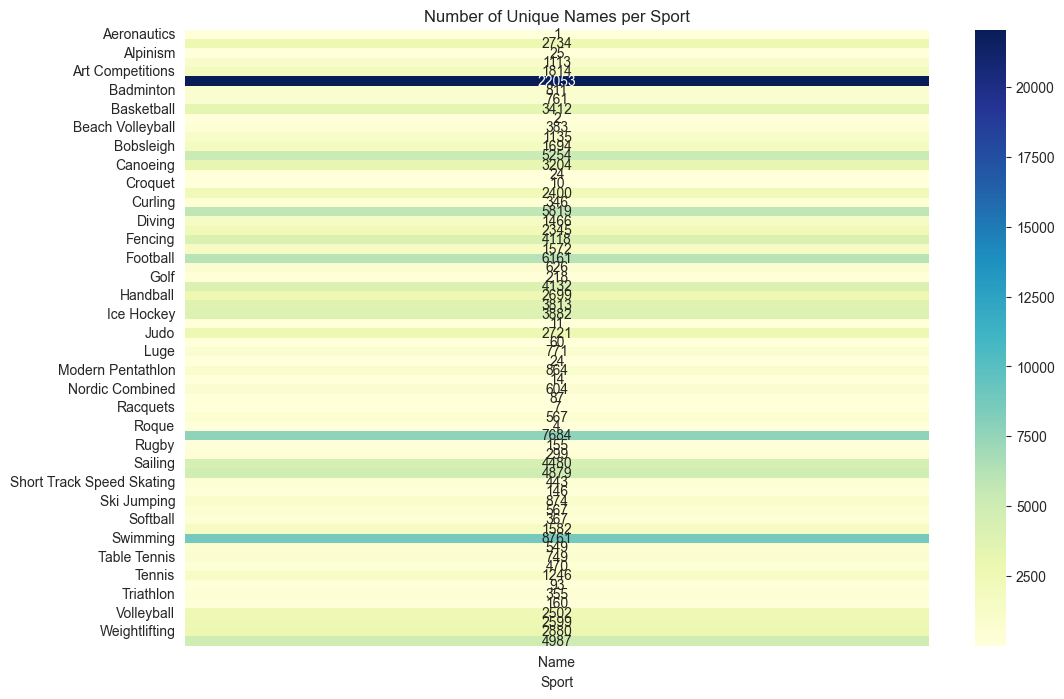

In [64]:
# Calculate the number of unique Names per sport
name_count = df.groupby("Sport")["Name"].nunique().reset_index()
name_count = name_count.pivot_table(index="Sport", columns=None, values="Name")

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as desired
sns.heatmap(name_count, cmap='YlGnBu', cbar=True, annot=True, fmt="d")
plt.title("Number of Unique Names per Sport")
plt.xlabel("Sport")
plt.ylabel("")

# Display the heatmap
plt.show()


ValueError: Unknown format code 'd' for object of type 'float'

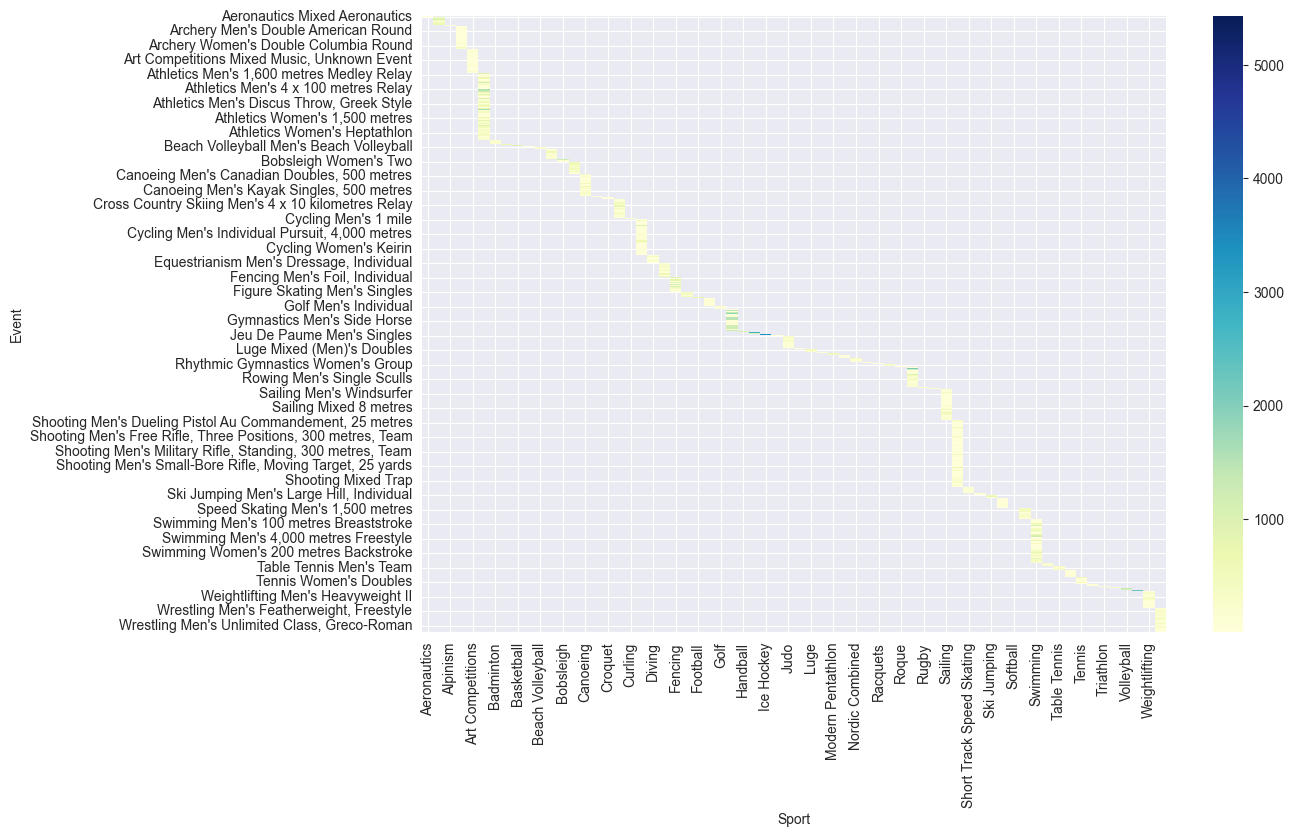

In [67]:
# Calculate the number of unique Names per Event and Sport
name_count = df.groupby(["Event", "Sport"])["Name"].nunique().reset_index()

# Create a pivot table with Event as index, Sport as columns, and the count of unique Names as values
pivot_table = name_count.pivot(index="Event", columns="Sport", values="Name")

# Create a heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size as desired
sns.heatmap(pivot_table, cmap='YlGnBu', cbar=True, annot=True, fmt="d")
plt.title("Number of Unique Names per Event and Sport")
plt.xlabel("Sport")
plt.ylabel("Event")

# Display the heatmap
plt.show()


<Axes: >

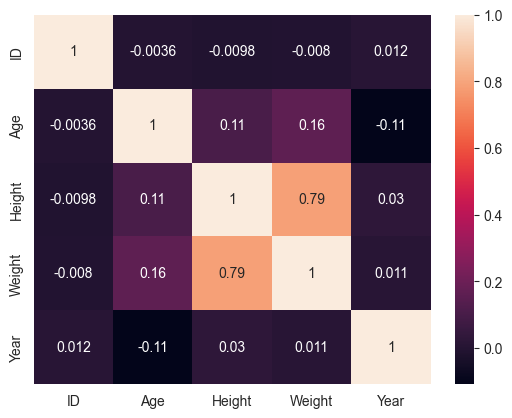

In [69]:
num_df = df.select_dtypes(include=np.number)
sns.heatmap(num_df.corr(), annot=True)

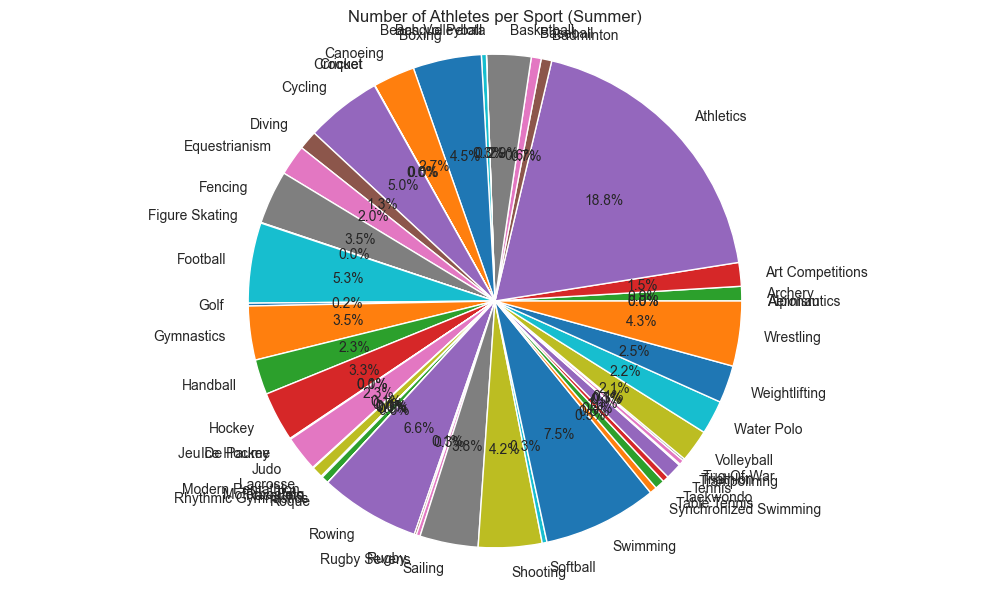

In [56]:
# Filter for Summer data
summer_data = df[df["Season"] == "Summer"]

# Calculate the number of Names per Sport
name_count = summer_data.groupby("Sport")["Name"].nunique().reset_index()

# Create a pie chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as desired
plt.pie(name_count["Name"], labels=name_count["Sport"],
        autopct="%1.1f%%")
plt.title("Number of Athletes per Sport (Summer)")
plt.axis("equal")

# Display the chart
plt.tight_layout()
plt.show()



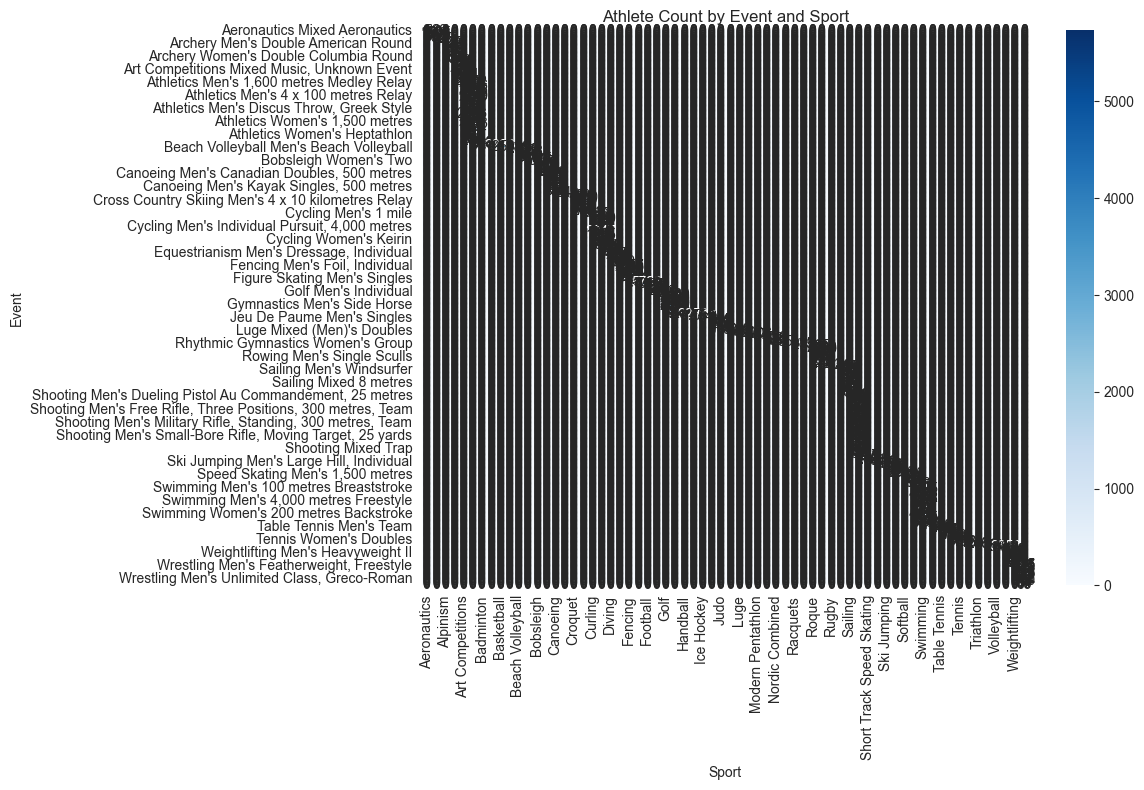

In [44]:
# Event ve Spor başına sporcu sayısını hesaplayın ve pivot tablo oluşturun
pivot_table = df.pivot_table(index='Event', columns='Sport', values='Name', aggfunc='count', fill_value=0)

# Heatmap çizimi
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='.0f', cbar=True)

# Grafik ayarları
plt.xlabel('Sport')
plt.ylabel('Event')
plt.title('Athlete Count by Event and Sport')

plt.tight_layout()
plt.show()


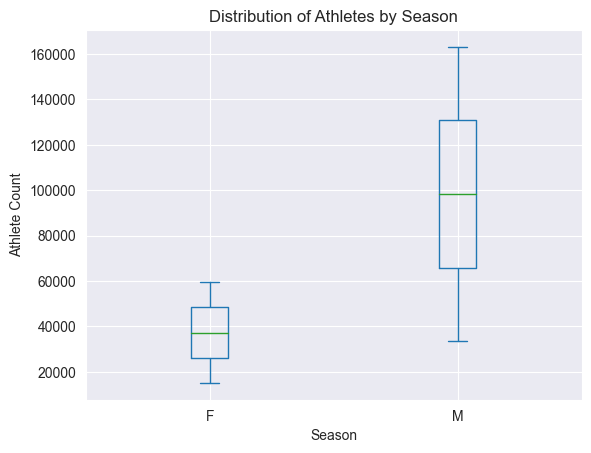

In [23]:
# Games değerlerini Season değerlerine göre gruplandırın
grouped = df.groupby('Season')['Games'].value_counts().unstack()

# Sporcu sayısının dağılımını hesaplayın
athlete_counts = df.groupby('Season')['Sex'].value_counts().unstack()

# Box plot çizmek için
athlete_counts.plot(kind='box')

# Grafik ayarları
plt.xlabel('Season')
plt.ylabel('Athlete Count')
plt.title('Distribution of Athletes by Season')

# Grafikleri gösterin
plt.show()




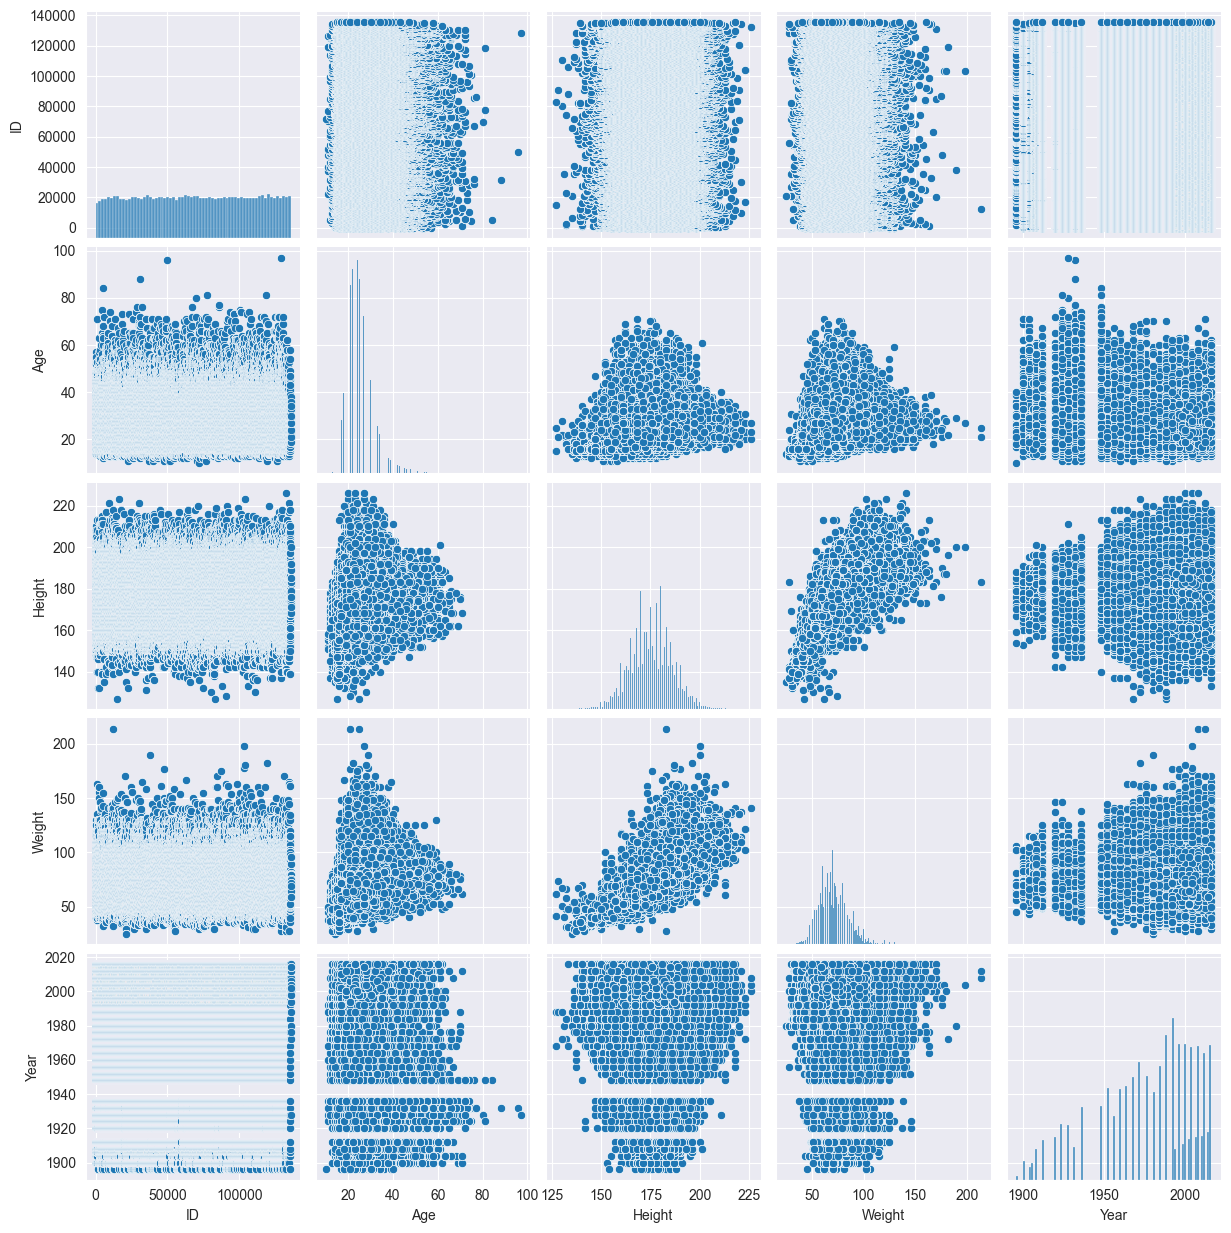

In [64]:
sns.pairplot(df)